In [28]:
import numpy as np
from sklearn.cluster import KMeans
import cv2
import datetime
from matplotlib import pyplot as plt
import time

(13202, 22364)
(5000, 5000, 3)


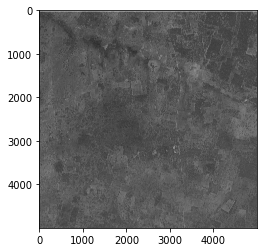

In [29]:
image = cv2.imread("slab4_202001_smallPart.tif", -1)
print(image.shape)
#image = image[0:5000, 5000:10000]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = (image * 255).astype(np.uint8)
image = image.astype(np.uint8)
print(image.shape)
plt.imshow(image)

In [30]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [31]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.1)

In [32]:
# number of clusters (K)
k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [33]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten() 
print(centers)

[[ 59  59  59]
 [105 105 105]
 [253 253 253]
 [ 72  72  72]]


In [34]:
centers[0] = [0,153,0]

In [35]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

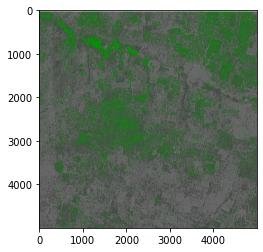

True

In [36]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()
cv2.imwrite("result.jpg", segmented_image)